In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import torch
from torch import nn

from hparams.light34_hparams import create_hparams
from model import Model
from datasets import LJDataset, TextMelCollate
from utils import sizeof_fmt, Logger

In [2]:
!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="1"

Mon Mar  8 12:05:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.04    Driver Version: 455.23.04    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090    Off  | 00000000:19:00.0 Off |                  N/A |
| 73%   65C    P2   272W / 370W |   9654MiB / 24268MiB |     96%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 3090    Off  | 00000000:68:00.0 Off |                  N/A |
| 66%   

In [3]:
save_dir = 'save/light34_model'
logger = Logger(save_dir=save_dir, new=False)
print('done')

done


In [4]:
!ls $save_dir

data.json  save_0


In [5]:
stt_hparams, tts_hparams = create_hparams()
model = Model(stt_hparams, tts_hparams)
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=tts_hparams.lr, weight_decay=tts_hparams.weight_decay)

step = 0

size = sizeof_fmt(4 * sum(p.numel() for p in model.parameters()))
print(f"Model size {size}")

size = sizeof_fmt(4 * sum(p.numel() for p in model.tts.parameters()))
print(f"TTS size {size}")

size = sizeof_fmt(4 * sum(p.numel() for p in model.tts.mel_encoder.parameters()))
print(f"MelEncoder size {size}")

size = sizeof_fmt(4 * sum(p.numel() for p in model.tts.mel_decoder.parameters()))
print(f"MelDecoder size {size}")

if False:
    model, optimizer, step = logger.load(step, model, optimizer)
print(step)

print('done')

Model size 80.9MiB
TTS size 74.6MiB
MelEncoder size 32.2MiB
MelDecoder size 33.6MiB
0
done


In [6]:
trainset = LJDataset(tts_hparams.root_dir)
collate_fn = TextMelCollate()
train_loader = torch.utils.data.DataLoader(trainset, num_workers=tts_hparams.num_workers, 
                          shuffle=True,
                          sampler=None,
                          batch_size=tts_hparams.batch_size, pin_memory=False,
                          drop_last=True, collate_fn=collate_fn)

print(train_loader)

In [7]:
def to_cuda(batch):
    batch['text'] = batch['text'].cuda()
    batch['text_lengths'] = batch['text_lengths'].cuda()
    batch['mels'] = batch['mels'].cuda()
    batch['mel_lengths'] = batch['mel_lengths'].cuda()
    
    return batch

elapsed time : 0.014412474632263184


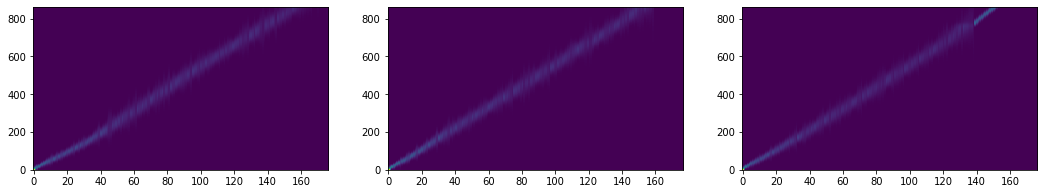

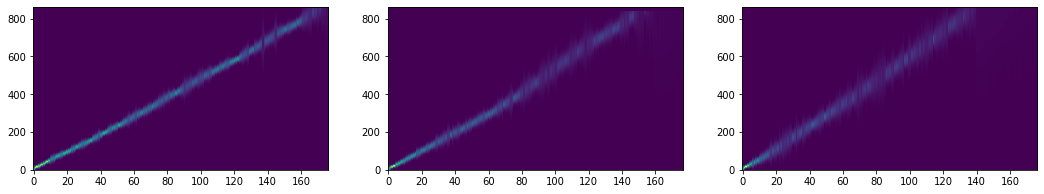

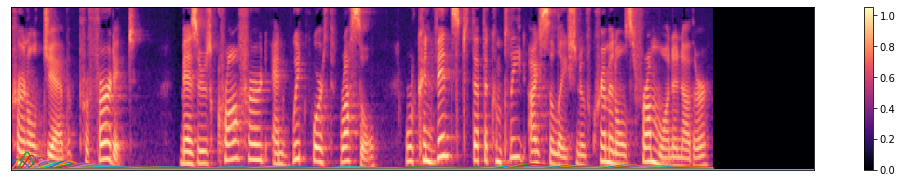

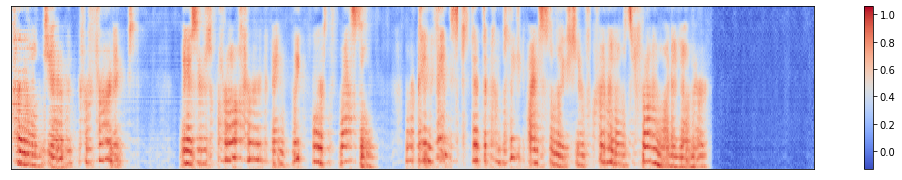

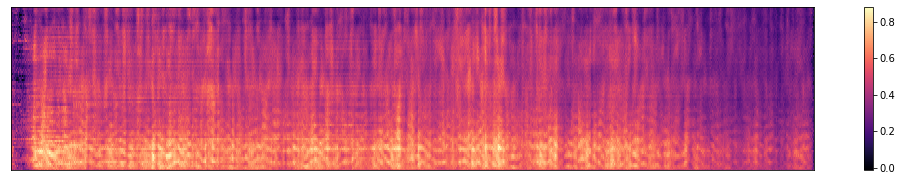

tensor(1.6096, device='cuda:0')
step : 1501 stt : 1.3791 tts : 2.7805 recon : 0.0045 kl : 0.0561 beta : 0.0301
tensor(1.5199, device='cuda:0')
step : 1502 stt : 1.4419 tts : 2.4863 recon : 0.0046 kl : 0.0535 beta : 0.0301
tensor(1.2595, device='cuda:0')
step : 1503 stt : 1.6117 tts : 2.0808 recon : 0.0041 kl : 0.0535 beta : 0.0301
tensor(1.5477, device='cuda:0')
step : 1504 stt : 1.4926 tts : 2.4177 recon : 0.0053 kl : 0.0541 beta : 0.0301
tensor(2.5130, device='cuda:0')
step : 1505 stt : 1.4552 tts : 2.4785 recon : 0.0041 kl : 0.0544 beta : 0.0301
tensor(1.9464, device='cuda:0')
step : 1506 stt : 1.4694 tts : 2.5288 recon : 0.0054 kl : 0.0546 beta : 0.0302
tensor(1.5136, device='cuda:0')
step : 1507 stt : 1.5120 tts : 2.4068 recon : 0.0046 kl : 0.0563 beta : 0.0302
tensor(2.2977, device='cuda:0')
step : 1508 stt : 1.4533 tts : 2.5329 recon : 0.0046 kl : 0.0562 beta : 0.0302
tensor(1.4852, device='cuda:0')
step : 1509 stt : 1.4515 tts : 2.5297 recon : 0.0049 kl : 0.0557 beta : 0.0302
t

tensor(1.7368, device='cuda:0')
step : 1575 stt : 1.4386 tts : 2.4813 recon : 0.0044 kl : 0.0524 beta : 0.0315
tensor(1.6555, device='cuda:0')
step : 1576 stt : 1.3128 tts : 2.7996 recon : 0.0055 kl : 0.0521 beta : 0.0316
tensor(2.1280, device='cuda:0')
step : 1577 stt : 1.4368 tts : 2.4930 recon : 0.0042 kl : 0.0527 beta : 0.0316
tensor(1.9866, device='cuda:0')
step : 1578 stt : 1.2613 tts : 2.9126 recon : 0.0054 kl : 0.0527 beta : 0.0316
tensor(2.8025, device='cuda:0')
step : 1579 stt : 1.4746 tts : 2.3673 recon : 0.0047 kl : 0.0549 beta : 0.0316
tensor(1.4390, device='cuda:0')
step : 1580 stt : 1.4184 tts : 2.4538 recon : 0.0054 kl : 0.0528 beta : 0.0316
tensor(2.9338, device='cuda:0')
step : 1581 stt : 1.2873 tts : 2.8589 recon : 0.0062 kl : 0.0527 beta : 0.0317
tensor(1.9322, device='cuda:0')
step : 1582 stt : 1.3215 tts : 2.7880 recon : 0.0069 kl : 0.0521 beta : 0.0317
tensor(1.5632, device='cuda:0')
step : 1583 stt : 1.4834 tts : 2.4045 recon : 0.0065 kl : 0.0509 beta : 0.0317
t

KeyboardInterrupt: 

In [12]:
from IPython import display
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import time

model.train()

while(True):
    
    for batch in train_loader:
        batch = to_cuda(batch)
        
        model.train()
        model.increase_step()
        model.zero_grad()

        stt_outputs, tts_outputs = model(batch)
        loss = tts_outputs['loss'] + stt_outputs['loss']
        loss.backward()
        
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), 1)
        print(grad_norm.mean())
        if torch.isnan(grad_norm.mean()):
            continue
        
        optimizer.step()
        
        if step % 5000 == 0:
            logger.save(step, model, optimizer)
        
        if step % 1 == 0:
            print('step :', step, 
                  'stt :', '%0.4f' % stt_outputs['loss'].item(),
                  'tts :', '%0.4f' % tts_outputs['loss'].item(),
                  'recon :', '%0.4f' % tts_outputs['recon_loss'].item(),
                  'kl :', '%0.4f' % tts_outputs['kl_loss'].item(),
                  'beta :', '%0.4f' % model.beta.item())
                  
            
        if step % 100 == 0:
            logger.log(step, 'stt_loss', stt_outputs['loss'].item())
            logger.log(step, 'tts_loss', tts_outputs['loss'].item())    
            logger.log(step, 'recon_loss', tts_outputs['recon_loss'].item())    
            logger.log(step, 'kl_loss', tts_outputs['kl_loss'].item())    
            logger.log(step, 'beta', model.beta.item())    
            
        if step % 100 == 0:
            display.clear_output()
            
            index = 3
            model.eval()
            
            with torch.no_grad():
                times = []
                for _ in range(10):
                    t0 = time.time()
                    samples, _ = model.inference(batch['text'], batch['mels'].size(2), stt_outputs["alignments"], temperature=0.7)
                    t1 = time.time()
                    times.append(t1 - t0)
                times = np.array(times)
                print('elapsed time :', np.mean(times))

            _tts_alignments = tts_outputs["alignments"].data.cpu().numpy()
            batch_size = _tts_alignments.shape[0]
            plt.figure(figsize=[18, 3])
            for i in range(3):
                plt.subplot(1, 3, i+1)
                plt.imshow(_tts_alignments[i].T, aspect='auto', origin='lower', interpolation='none')
            plt.show()
            
            _stt_alignments = stt_outputs["alignments"].data.cpu().numpy()
            batch_size = _stt_alignments.shape[0]
            plt.figure(figsize=[18, 3])
            for i in range(3):
                plt.subplot(1, 3, i+1)
                plt.imshow(_stt_alignments[i].T, aspect='auto', origin='lower', interpolation='none')
            plt.show()
            
            plt.figure(figsize=[18, 3])
            _x = batch['mels'].data.cpu().numpy()
            librosa.display.specshow(_x[index])
            plt.colorbar()
            
            for i in range(_stt_alignments.shape[1]):
                plt.plot(_stt_alignments[index, i] * 100)
                
            plt.show()
            
            plt.figure(figsize=[18, 3])
            _y = tts_outputs['pred'].data.cpu().numpy()
            librosa.display.specshow(_y[index])
            plt.colorbar()
            plt.show()
            
            plt.figure(figsize=[18, 3])
            _s = samples.data.cpu().numpy()
            librosa.display.specshow(_s[index, :, :_y.shape[2]])
            plt.colorbar()
            plt.show()
                      
        step += 1
        

In [13]:
logger.save(step, model, optimizer)

saved save/light34_model/save_1600


torch.Size([1, 80, 928]) 0.010047242641448975
{'alignment': 0.0003428459167480469, 'random': 0.00027251243591308594, 'last_conv': 0.0025634765625, 'z_proj': 0.00025534629821777344, 'cond': 0.0007226467132568359, 'up': 0.0009088516235351562, 'encode': 0.0039005279541015625, 'pad': 2.7179718017578125e-05, 'enc_conv': 0.0009105205535888672, 'enc_lstm': 0.002867460250854492}


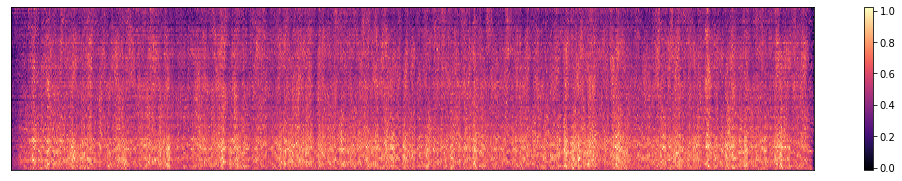

In [10]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import time 

for batch in train_loader:
    batch = to_cuda(batch)
    break
        
model.eval()
with torch.no_grad():
    index = 0
    times = []
    for _ in range(100):
        t0 = time.time()
        samples, time_dict = model.inference(batch['text'][0:1], None, None, temperature=1.0)
        t1 = time.time()
        times.append(t1 - t0)
    times = np.array(times)
    print(samples.shape, np.mean(times))
    print(time_dict)
    
    plt.figure(figsize=[18, 3])
    _s = samples.data.cpu().numpy()
    librosa.display.specshow(_s[index])
    plt.colorbar()
    plt.show()

In [11]:
time_sum = 0
for key in time_dict.keys():
    time_sum += time_dict[key]

for key in time_dict.keys():
    print(key, '%0.2f' % (time_dict[key] / time_sum))


alignment 0.03
random 0.02
last_conv 0.20
z_proj 0.02
cond 0.06
up 0.07
encode 0.31
pad 0.00
enc_conv 0.07
enc_lstm 0.22
